In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [13]:
print(train.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [15]:
print(test.isna().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [17]:
print(train[['Survived','Pclass','Age','SibSp','Parch','Fare']].corr())

          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000


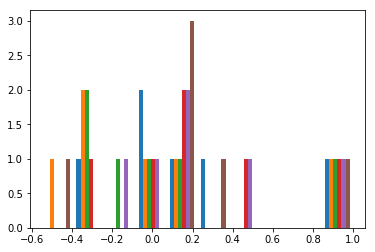

In [22]:
x = train[['Survived','Pclass','Age','SibSp','Parch','Fare']].corr()
plt.hist(x)
plt.show()

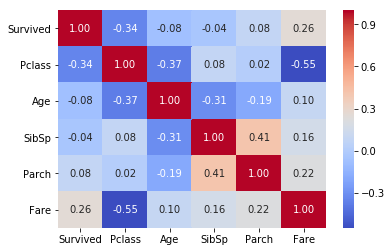

In [35]:
sns.heatmap(x , annot=True , fmt=".2f" , cmap="coolwarm")

        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


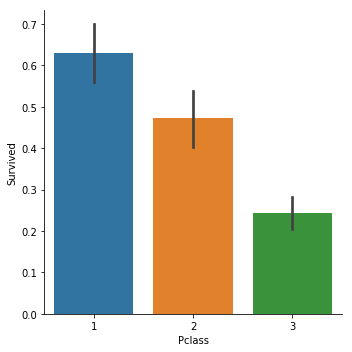

In [40]:
# Relation Between PcClass And Survived
print(train[['Survived','Pclass']].groupby(['Pclass']).mean())
sns.catplot(x='Pclass',y='Survived', kind="bar" , data = train)

        Survived
Sex             
female  0.742038
male    0.188908


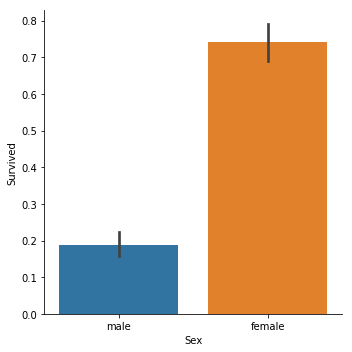

In [41]:
print(train[['Sex', 'Survived']].groupby(['Sex']).mean())
sns.catplot(x='Sex', y='Survived',  kind='bar', data=train)

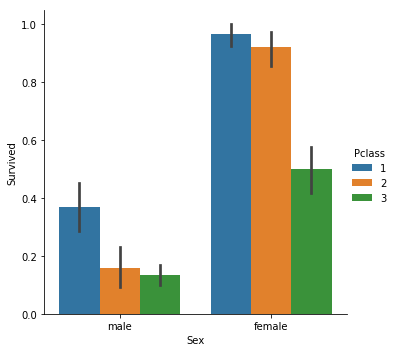

In [45]:
sns.catplot(x='Sex' , y='Survived' , data = train , hue='Pclass' , kind='bar')

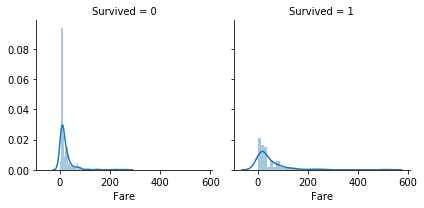

In [50]:
fare = sns.FacetGrid(train , col='Survived')
fare = fare.map(sns.distplot , 'Fare')